In [ ]:
!pip install praw
from IPython.display import clear_output 
clear_output()

In [ ]:
import praw
import re

#inicializar cliente de PRAW    
reddit = praw.Reddit(
    client_id="Client ID,
    client_secret="Client Secret",
    user_agent="User Agent
    check_for_async=False
)

print(reddit.user.me())

print(reddit.read_only)

None
True


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: The `None` return value is deprecated, and will raise a `ReadOnlyException` beginning with PRAW 8. See documentation for forward compatibility options.
  if sys.path[0] == '':


In [ ]:
reddit.subreddit("depression")

Subreddit(display_name='depression')

In [ ]:
def searchBySubredditHot(subreddit, postsNum):
    Subreddit = reddit.subreddit(subreddit)
    
    comments = []
    
    
    for submission in Subreddit.hot(limit=postsNum):
      comments.append(submission.selftext)
     
    
    return comments

In [ ]:
def searchBySubredditNew(subreddit, postsNum):
    Subreddit = reddit.subreddit(subreddit)
    
    comments = []
    
    
    for submission in Subreddit.new(limit=postsNum):
      comments.append(submission.selftext)
     
    
    return comments

In [ ]:
def searchByComment(subreddit, postsNum):
    Subreddit = reddit.subreddit(subreddit)
    
    comments = []
    
    for submission in Subreddit.hot(limit=postsNum):
      #print(submission.title)
      for comment in submission.comments.list()[:100]:
                  comments.append(comment.body)
    
    return comments

# Obtención de datos negativos

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

In [ ]:
 ! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d nikhileswarkomati/suicide-watch

 92% 56.0M/60.6M [00:00<00:00, 70.7MB/s]
100% 60.6M/60.6M [00:00<00:00, 95.4MB/s]


In [ ]:
!unzip suicide-watch.zip

Archive:  suicide-watch.zip
  inflating: Suicide_Detection.csv   


In [ ]:
negativeComments = searchBySubredditHot("depression", 1000)

In [ ]:
temp = searchBySubredditNew("depression", 1000)
negativeComments = negativeComments + temp

In [ ]:
temp = searchByComment("depression", 50)
negativeComments = negativeComments + temp

In [ ]:
temp = searchBySubredditHot("SuicideWatch", 1000)
negativeComments = negativeComments + temp

In [ ]:
temp = searchBySubredditNew("SuicideWatch", 1000)
negativeComments = negativeComments + temp

In [ ]:
temp = searchByComment("SuicideWatch", 5)
negativeComments = negativeComments + temp

In [ ]:
temp = searchBySubredditHot("sad", 1000)
negativeComments = negativeComments + temp

In [ ]:
temp = searchBySubredditNew("sad", 1000)
negativeComments = negativeComments + temp

In [ ]:
temp = searchBySubredditHot("depression_help", 1000)
negativeComments = negativeComments + temp

In [ ]:
temp = searchBySubredditNew("depression_help", 1000)
negativeComments = negativeComments + temp

In [ ]:
temp = searchByComment("depression_help", 10)
negativeComments = negativeComments + temp

In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
DATASET_COLUMNS = ["number", "text", "class"]
df = pd.read_csv('Suicide_Detection.csv', names=DATASET_COLUMNS)

In [ ]:
negative = df[df['class'] == 'suicide']
negative

,number,text,class
1,2.0,Ex Wife Threatening SuicideRecently I left my ...,suicide
4,8.0,i need helpjust help me im crying so hard,suicide
5,9.0,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
6,11.0,Honetly idkI dont know what im even doing here...,suicide
7,12.0,[Trigger warning] Excuse for self inflicted bu...,suicide
...,...,...,...
232062,348090.0,I’ve fucking had enough.None of this depressio...,suicide
232063,348092.0,paralyzing anxiety &amp; depression are pushin...,suicide
232067,348098.0,My mom tried to kill herself today. I feel los...,suicide
232068,348100.0,I’m a fucking scummy person and I can’t change...,suicide


In [ ]:
negative = negative.loc[np.random.choice(negative.index, 5000, replace=False)]

In [ ]:
negative = negative['text'].tolist()

In [ ]:
negativeComments = negativeComments + negative

# Obtención de datos positivos

In [ ]:
positiveComments = searchBySubredditHot("wholesome", 1000)

In [ ]:
temp = searchBySubredditNew("wholesome", 1000)
positiveComments = positiveComments + temp

In [ ]:
temp = searchByComment("wholesome", 100)
positiveComments = positiveComments + temp

In [ ]:
temp = searchBySubredditNew("Positive", 1000)
positiveComments = positiveComments + temp

In [ ]:
temp = searchBySubredditHot("Positive", 1000)
positiveComments = positiveComments + temp

In [ ]:
temp = searchByComment("Positive", 100)
positiveComments = positiveComments + temp

In [ ]:
temp = searchBySubredditNew("happy", 1000)
positiveComments = positiveComments + temp

In [ ]:
temp = searchBySubredditHot("happy", 1000)
positiveComments = positiveComments + temp

In [ ]:
temp = searchByComment("happy", 10)
positiveComments = positiveComments + temp

In [ ]:
temp = searchBySubredditNew("MadeMeSmile", 1000)
positiveComments = positiveComments + temp

In [ ]:
temp = searchBySubredditHot("MadeMeSmile", 1000)
positiveComments = positiveComments + temp

In [ ]:
temp = searchByComment("MadeMeSmile", 10)
positiveComments = positiveComments + temp

In [ ]:
temp = searchBySubredditNew("HumansBeingBros", 1000)
positiveComments = positiveComments + temp

In [ ]:
temp = searchBySubredditHot("HumansBeingBros", 1000)
positiveComments = positiveComments + temp

In [ ]:
temp = searchByComment("HumansBeingBros", 5)
positiveComments = positiveComments + temp

In [ ]:
!kaggle datasets download -d ehallmar/reddit-comment-score-prediction

 99% 805M/815M [00:06<00:00, 165MB/s]
100% 815M/815M [00:06<00:00, 132MB/s]


In [ ]:
!unzip reddit-comment-score-prediction.zip

Archive:  reddit-comment-score-prediction.zip
  inflating: comments_negative.csv   
  inflating: comments_positive.csv   


In [ ]:
DATASET_COLUMNS = ["number", "text", "class"]
df = pd.read_csv('comments_positive.csv')

In [ ]:
df = df.drop(['id', 'parent_id', 'subreddit_id', 'link_id', 'score', 'ups', 'controversiality', 'parent_text', 'parent_score','parent_link_id', 'parent_link_id', 'parent_link_id', 'parent_ups', 'parent_author', 'parent_controversiality'], axis=1)

In [ ]:
df = df.loc[np.random.choice(df.index, 8000, replace=False)]

In [ ]:
df = df['text'].tolist()

In [ ]:
positiveComments = positiveComments + df

In [ ]:
comments = []
for i in positiveComments:

          
        processedtext = re.sub(r'\[(?P<word>.*?)\].*?\)', '\g<word>', i)

        processedtext = re.sub(r'r\/(?P<subr>\w*)', '\g<subr>', processedtext)
        
        processedtext = re.sub(r'u\/(?P<subr>\w*)', '', processedtext)

        text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
        processedtext = re.sub(text_cleaning_re, ' ' ,processedtext)
        comments.append(processedtext)

In [ ]:
positiveComments = comments

In [ ]:
comments = []
for i in negativeComments:

          
        processedtext = re.sub(r'\[(?P<word>.*?)\].*?\)', '\g<word>', i)

        processedtext = re.sub(r'r\/(?P<subr>\w*)', '\g<subr>', processedtext)
        
        processedtext = re.sub(r'u\/(?P<subr>\w*)', '', processedtext)

        text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
        processedtext = re.sub(text_cleaning_re, ' ' ,processedtext)
        comments.append(processedtext)

In [ ]:
negativeComments = comments

In [ ]:
positiveComments = list(filter(None, positiveComments))

In [ ]:
negativeComments  = list(filter(None, negativeComments))

# Distribución de Datos

In [ ]:
print('Numero de comentarios negativos:', len(negativeComments))
print('Numero de comentarios positivos:', len(positiveComments))

Numero de comentarios negativos: 12468
Numero de comentarios positivos: 10374


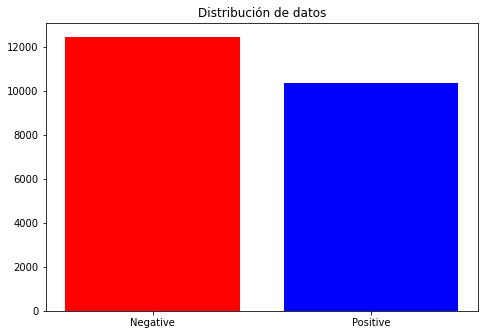

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Distribución de datos')
cat = ['Negative', 'Positive']
res = [len(negativeComments), len(positiveComments)]
x_pos = np.arange(len(cat))
ax.bar(x_pos, res, color=['red', 'blue'])
plt.xticks(x_pos, cat)
plt.show()

In [ ]:
import pandas as pd

In [ ]:
dfPositivos = pd.DataFrame(positiveComments, columns=['text'])

In [ ]:
dfPositivos.head()

,text
0,Fucking shit What s the end of the story of th...
1,Omg such a lovely granny Happy many many more ...
2,I m pissed he didn t post the full video
3,What Noooo I wanted to hear the rest of the st...
4,I want to know too


In [ ]:
dfPositivos['sentiment'] = 1

In [ ]:
dfPositivos = dfPositivos.sample(n=10000)

In [ ]:
dfPositivos

,text,sentiment
9757,Kind of like the Roselli brothers casino theft,1
2599,OP,1
8540,Dad,1
1931,They are not wrong Dude does look like Tony Hawk,1
2494,Like quiptonite,1
...,...,...
6542,I prefer the Sick Duck,1
7878,One tough water bender I d wager,1
3751,The only people to defend attacks on our civil...,1
3615,he looks like a middle aged lesbian,1


In [ ]:
dfNegativos = pd.DataFrame(negativeComments, columns=['text'])

In [ ]:
dfNegativos.head()

,text
0,We understand that most people who reply immed...
1,Welcome to depression s check in post a place ...
2,You ever notice Therapists will see you for 45...
3,if we all came together in real life we could ...
4,I m not able to do anything right And I have n...


In [ ]:
dfNegativos['sentiment'] = 0

In [ ]:
dfNegativos = dfNegativos.sample(n=10000)

In [ ]:
dfNegativos

,text,sentiment
6537,I m looking into long term solutions but right...,0
3998,Chronic Depression I m at this nihilistic poin...,0
8699,Thinking about the best way to do itTwo weeks ...,0
978,I just don t feel like doing anything anymore ...,0
5060,I was on lonely as I was feeling that way I co...,0
...,...,...
5975,It s been years that i don t feel what i m fee...,0
31,There s no chance i will find how to cut mysel...,0
2566,So sorry The sub petloss is a good place to sh...,0
1719,I m consumed with my own issues I lean on othe...,0


In [ ]:
frames = [dfNegativos, dfPositivos]

In [ ]:
dfFinal = pd.concat(frames)

In [ ]:
dfFinal

,text,sentiment
6537,I m looking into long term solutions but right...,0
3998,Chronic Depression I m at this nihilistic poin...,0
8699,Thinking about the best way to do itTwo weeks ...,0
978,I just don t feel like doing anything anymore ...,0
5060,I was on lonely as I was feeling that way I co...,0
...,...,...
6542,I prefer the Sick Duck,1
7878,One tough water bender I d wager,1
3751,The only people to defend attacks on our civil...,1
3615,he looks like a middle aged lesbian,1


In [ ]:
dfFinal.to_csv('reddit.csv', index=False)

In [ ]:
dfNuevo = pd.read_csv('reddit.csv')

In [ ]:
dfNuevo.head()

,text,sentiment
0,I m looking into long term solutions but right...,0
1,Chronic Depression I m at this nihilistic poin...,0
2,Thinking about the best way to do itTwo weeks ...,0
3,I just don t feel like doing anything anymore ...,0
4,I was on lonely as I was feeling that way I co...,0


In [ ]:
largos = dfNuevo['text'].str.len() > 1024

In [ ]:
cortos = dfNuevo['text'].str.len() < 1024

In [ ]:
largos

0        False
1        False
2         True
3        False
4        False
         ...  
19995    False
19996    False
19997    False
19998    False
19999    False
Name: text, Length: 20000, dtype: bool

In [ ]:
df =  dfNuevo.loc[largos]

In [ ]:
text = df['text']

In [ ]:
text = text.to_list()

In [ ]:
df = df.drop(['text'], axis=1)

In [ ]:
df

,sentiment
2,0
6,0
11,0
13,0
15,0
...,...
19830,1
19833,1
19881,1
19960,1


In [ ]:
df['text'] = text

In [ ]:
df

,sentiment,text
2,0,Thinking about the best way to do itTwo weeks ...
6,0,I posted this in depression but I figured it a...
11,0,I wish I would die but am not strong enough to...
13,0,I feel so damn stupid and I feel like I m bad ...
15,0,I m tired I feel like shit 24 7 The older I ge...
...,...,...
19830,1,I think Civ5 shows why you cannot have militar...
19833,1,Hi How are you I m Cherry I have crohn s disea...
19881,1,Guantanamo Bay is still open and running Obama...
19960,1,This Saturday I m 23 f going to go with my fri...
